In [4]:
import altair as alt
import pandas as pd
from altair import datum
alt.renderers.enable('notebook')

RendererRegistry.enable('notebook')

In [5]:
source=pd.read_csv("http://djangoviz.libtech.in/media/batting.csv")
source.head()

,name,country,matches,innings,no,runs,highest,average,balls,strikerate,hunderd,fifty,duck,year
0,SR Tendulkar,INDIA,34,33,4,1894,143,65.31,1854,102.15,9,7,0,1998
1,SC Ganguly,INDIA,41,41,3,1767,183,46.50,2325,76.00,4,10,1,1999
2,R Dravid,INDIA,43,43,5,1761,153,46.34,2343,75.16,6,8,3,1999
3,SR Tendulkar,INDIA,32,32,2,1611,137,53.70,1954,82.44,6,9,0,1996
4,ML Hayden,AUS,32,30,3,1601,181*,59.29,1795,89.19,5,6,1,2007


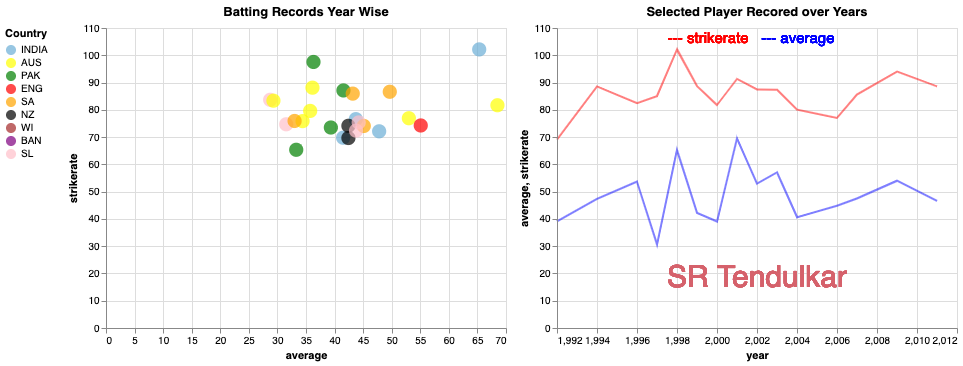

In [7]:
  alt.data_transformers.disable_max_rows()
  slider = alt.binding_range(min=1990, max=2018, step=1)
  select_year = alt.selection_single(name="year", fields=['year'], on='none' ,clear='none',
                                             bind=slider, init={'year': 1998})
  singlePlayer = alt.selection_single(empty='none', fields=['name'] , init={'name':'SR Tendulkar'})
  domain=["INDIA","AUS","PAK","ENG","SA","NZ","WI","BAN","SL"]
  range_=["#6baed6","yellow","green","red","orange","black","brown","purple","pink"]
  base=alt.Chart(source).mark_circle().encode(
#      x=alt.X('average',scale=alt.Scale(domain=[0, 200])),
#      y=alt.Y('strikerate',scale=alt.Scale(domain=[0, 200])),
      x='average',
      y='strikerate',
      #color='country',
      color=alt.Color('country', legend=alt.Legend(title='Country', orient = 'left'),scale=alt.Scale(domain=domain, range=range_)),
      tooltip=['name', 'country', 'average', 'strikerate']
  ).add_selection(
    select_year,
    singlePlayer
  ).transform_filter(
     datum.runs > 450
  ).transform_filter(
    select_year
  ).properties(
   title="Batting Records Year Wise"
)

  titleLine = alt.Chart(source).mark_text(dy=100, size=30, opacity=0.5,text='foo-baz', color='#d6616b').encode(
      text='name:N',
      opacity=alt.value(0.5)
      ).transform_filter(
          singlePlayer
          )

  label1 = alt.Chart(source).mark_text(align='left', dy=-140,size=15, opacity=0.5,text=' --- average', color='blue')
  label2 = alt.Chart(source).mark_text(dy=-140, size=15, align='right',opacity=0.5,text=' --- strikerate  ', color='red')
  combinedLine=alt.Chart(source).mark_line(point=True).encode(
          x='year:Q',
)

  z=alt.layer(
    combinedLine.mark_line(color='blue',opacity=.5).encode(
        y='average',
        ),
    combinedLine.mark_line(color='red',opacity=.5).encode(
        y='strikerate'
        )
).transform_filter(
singlePlayer
).properties(
  title='Selected Player Recored over Years'
 )
  myChart=base  | z + titleLine + label1 + label2
  myChart1=myChart.configure_circle(
   filled=True,
   size=200,
).properties(
autosize='fit'
)
  myChart1